# Bayesian Multivariate Normal Mean Model

The Bayesian multivariate normal mean model extends the univariate case by treating **multiple unknown mean parameters** as **jointly uncertain** through a multivariate normal distribution, then conditioning on observed data while accounting for correlations between parameters, which allows uncertainty about one parameter to inform and reduce uncertainty about others in ways that independent analyses cannot achieve.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide27.png)

<!-- ![fig](./cartoons/Bayesian_multivariate_normal_mean_model.svg) -->

# Key Formula

## General Form

In the bivariate normal mean model, if our joint uncertainty about the parameters is represented by the prior:

$$
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
\sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_{a,0}  \\
\beta_{b,0}
\end{pmatrix},
\begin{pmatrix}
\sigma_{a,0}^2 & \rho_0 \sigma_{a,0} \sigma_{b,0} \\
\rho_0 \sigma_{a,0} \sigma_{b,0} & \sigma_{b,0}^2
\end{pmatrix}
\right)
$$

then conditioning on observed data $\text{D}$ yields the posterior distribution:

$$
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
\bigg| \text{D} \sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_{a,1}  \\
\beta_{b,1}
\end{pmatrix},
\begin{pmatrix}
\sigma_{a,1}^2 & \rho_1 \sigma_{a,1} \sigma_{b,1} \\
\rho_1 \sigma_{a,1} \sigma_{b,1} & \sigma_{b,1}^2
\end{pmatrix}
\right)
$$

  **Parameters:**
  - $\beta_a, \beta_b$ = unknown mean parameters we cannot condition on
  - $\text{D}$ = observed data we condition on
  - Subscript $0$ = prior parameters (initial uncertainty)
  - Subscript $1$ = posterior parameters (updated uncertainty after conditioning)
  - $\rho_0, \rho_1$ = prior and posterior correlations quantifying how uncertainty about one parameter relates to uncertainty about the other

  **This general framework encompasses several things we have discussed previously as special cases**:

## Random Effects Meta-Analysis

When $\rho_0 = 0$ and $\sigma_{a,0} = \sigma_{b,0} = \sigma$:

$$
\begin{pmatrix}
\sigma^2 & 0 \\
0 & \sigma^2
\end{pmatrix}
$$

- **No correlation** between trait effects ($\rho_0 = 0$)
- **Equal uncertainty** for both traits ($\sigma_{a,0} = \sigma_{b,0}$)
- Effects are independent but equally variable across studies

## Fixed Effects Meta-Analysis

When $\sigma_{a,0} = \sigma_{b,0}$ and $\rho_0 = 1$:

$$
\begin{pmatrix}
\sigma^2 & \sigma^2 \\
\sigma^2 & \sigma^2
\end{pmatrix}
$$

- **Perfect correlation** between trait effects ($\rho_0 = 1$)
- **Equal uncertainty** for both traits
- Effects move together completely - if one is high, the other is high

## Trait-Specific Effects
When $\sigma_{a,0} = 0$ or $\sigma_{b,0} = 0$:

$$
\begin{pmatrix}
0 & 0 \\
0 & \sigma_{b,0}^2
\end{pmatrix} \quad \text{or} \quad
\begin{pmatrix}
\sigma_{a,0}^2 & 0 \\
0 & 0
\end{pmatrix}
$$

- **One trait has no effect** (zero variance)
- **Other trait varies** across studies
- Variant affects only one trait

# Technical Details

## The Bayesian Perspective: Joint Uncertainty

In the multivariate case, we extend our treatment of uncertainty by recognizing that multiple parameters may be jointly uncertain, and that our inability to condition on one parameter may be related to our inability to condition on others through correlation structures.

## Model Assumptions

In the Bayesian bivariate normal mean model, we treat the joint uncertainty about multiple parameters systematically:

$$
\begin{pmatrix}
Y_{i,a} \\
Y_{i,b}
\end{pmatrix} \sim \mathcal{N}\left(X_i \begin{pmatrix} \beta_a \\ \beta_b \end{pmatrix}, \boldsymbol{\Sigma} \right) \quad \text{for } i = 1, 2, \ldots, N
$$

where:
- $\boldsymbol{\beta} = \begin{pmatrix} \beta_a \\ \beta_b \end{pmatrix}$ represents our joint uncertainty about both mean parameters
- $\boldsymbol{\Sigma}$ is the known covariance matrix (we condition on this)
- $X_i$ are observed covariates (we condition on these)

**Key insight**: Since we cannot condition on the true values of either $\beta_a$ or $\beta_b$, we treat them as jointly random variables, allowing their uncertainties to be correlated.

## Prior Distribution: Joint Uncertainty

We express our joint uncertainty about the parameter vector through a multivariate normal distribution:

$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_0)
$$

where:
- $\boldsymbol{\beta}_0$ represents our best joint guess about both parameters
- $\boldsymbol{\Sigma}_0$ quantifies not only our uncertainty about each parameter individually, but also how these uncertainties are related

The probability density function reflects this joint uncertainty:

$$
p(\boldsymbol{\beta}) \propto \exp\left(-\frac{1}{2}(\boldsymbol{\beta} - \boldsymbol{\beta}_0)^T \boldsymbol{\Sigma}_0^{-1} (\boldsymbol{\beta} - \boldsymbol{\beta}_0)\right)
$$

## Likelihood: What We Can Condition On

The likelihood represents what we can condition on - the observed data given our uncertain parameter vector:

$$
\begin{pmatrix}
Y_{i,a} \\
Y_{i,b}
\end{pmatrix} \bigg| \boldsymbol{\beta}, \boldsymbol{\Sigma} \sim \mathcal{N}\left(X_i \boldsymbol{\beta}, \boldsymbol{\Sigma} \right) \quad \text{for } i = 1, 2, \ldots, N
$$

For all observations, the likelihood is:

$$
p(\mathbf{Y}|\boldsymbol{\beta}) \propto \exp\left(-\frac{1}{2} \sum_{i=1}^N (\mathbf{Y}_i - X_i\boldsymbol{\beta})^T \boldsymbol{\Sigma}^{-1} (\mathbf{Y}_i - X_i\boldsymbol{\beta})\right)
$$

where $\mathbf{Y}_i = \begin{pmatrix} Y_{i,a} \\ Y_{i,b} \end{pmatrix}$.

## Posterior Distribution: Updated Joint Uncertainty

Using Bayes' theorem, we condition on all available information to update our joint uncertainty:

$$
p(\boldsymbol{\beta}|\mathbf{Y}) \propto p(\mathbf{Y}|\boldsymbol{\beta}) p(\boldsymbol{\beta})
$$

The posterior distribution follows a bivariate normal distribution:

$$
\boldsymbol{\beta} \mid \mathbf{Y} \sim \mathcal{N}\left( \boldsymbol{\beta}_1, \boldsymbol{\Sigma}_1 \right)
$$

where the parameters are:

$$
\boldsymbol{\Sigma}_1^{-1} = \boldsymbol{\Sigma}_0^{-1} + \sum_{i=1}^N X_i^2 \boldsymbol{\Sigma}^{-1} = \boldsymbol{\Sigma}_0^{-1} + T_1 \boldsymbol{\Sigma}^{-1}
$$

$$
\boldsymbol{\beta}_1 = \boldsymbol{\Sigma}_1 \left( \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\beta}_0 + \boldsymbol{\Sigma}^{-1} \sum_{i=1}^N X_i \mathbf{Y}_i \right) = \boldsymbol{\Sigma}_1 \left( \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\beta}_0 + \boldsymbol{\Sigma}^{-1} \mathbf{T}_2 \right)
$$

These can be written in terms of sufficient statistics:

$$
T_1 = \sum_{i=1}^N X_i^2, \quad \mathbf{T}_2 = \sum_{i=1}^N X_i \mathbf{Y}_i = \begin{pmatrix} \sum_{i=1}^N X_i Y_{i,a} \\ \sum_{i=1}^N X_i Y_{i,b} \end{pmatrix}
$$

**Key insight**: Notice that $\boldsymbol{\Sigma}_1$ has smaller variances than $\boldsymbol{\Sigma}_0$ - conditioning on data reduces our joint uncertainty about all parameters.

### Interpretation as Weighted Combination

The posterior mean represents a weighted combination of our prior beliefs and what we learned from data:

$$
\boldsymbol{\beta}_1 = \boldsymbol{W} \cdot \frac{\mathbf{T}_2}{T_1} + (\boldsymbol{I} - \boldsymbol{W}) \cdot \boldsymbol{\beta}_0
$$

where $\boldsymbol{W}$ is a weight matrix that depends on the relative amount of information in the data versus our prior uncertainty.

This shows how conditioning works in the multivariate case:
- **More informative data**: $\boldsymbol{W} \approx \boldsymbol{I}$, we trust the data more
- **More uncertain prior**: $\boldsymbol{W} \approx \boldsymbol{I}$, we let data dominate since our prior was vague
- **Less uncertain prior**: $\boldsymbol{W} \approx \boldsymbol{0}$, we stick closer to our prior beliefs

## Generalization to Multivariate Case

The bivariate formulation extends naturally to the general $p$-dimensional multivariate case by replacing:
- $2 \times 2$ matrices with $p \times p$ matrices
- Bivariate normal distributions with $p$-variate normal distributions  
- All matrix operations remain the same

**The fundamental principle remains**: We systematically handle joint uncertainty about multiple parameters we cannot condition on, then update this uncertainty by conditioning on observed data, allowing information about one parameter to reduce uncertainty about others through their correlation structure.

# Related Topics

- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)
- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [random effect](https://statfungen.github.io/statgen-primer/random_effect.html)
- [maximum likelihood estimation](https://statfungen.github.io/statgen-primer/maximum_likelihood_estimation.html)
- [Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html#)

# Example

In our previous example in [Lecture: Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html#), we analyzed how genetic variants affect a single trait (phenotype) using a Bayesian normal mean model. But what if we want to study **genetic effects on multiple related traits simultaneously**?

For example, a genetic variant might affect both height and weight, and these traits are likely correlated. Analyzing them together can be more powerful than analyzing each separately because:
- We can share information about our uncertainty across traits
- Our inability to condition on one effect can inform our uncertainty about another
- We can capture correlations between effects that separate analyses miss

This example shows how to implement a **Bayesian multivariate normal mean model** where we treat the genetic effect vector $\boldsymbol{\beta} = [\beta_a, \beta_b]$ as jointly uncertain. Instead of separate analyses, we get a joint posterior distribution that reflects our updated uncertainty about both effects and their relationship.

Using simulated data where a genetic variant affects both height (true effect $\beta_a = 0.3$) and weight (true effect $\beta_b = 0.4$) with correlated residuals, we'll see how our joint uncertainty about the effect vector gets updated when we condition on multivariate trait data.


## Generate Simulated Data

Let's create genetic data for 5 individuals where one variant affects both height and weight.


In [1]:
# Clear the environment and set reproducibility
rm(list = ls())
set.seed(27)

library(MASS)  # for multivariate normal generation

# Generate genotype data that we can condition on
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")
names(genotypes) <- paste("Individual", 1:N)

# Convert to additive coding and standardize (observed data we condition on)
alt_allele <- "T"
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]

# True effects we CANNOT condition on (unknown in practice)
true_beta <- c(0.3, 0.4)  # [height_effect, weight_effect]
names(true_beta) <- c("Height", "Weight")

# Known residual covariance (what we can condition on)
Sigma_known <- matrix(c(1.0, 0.6,   # height variance = 1, covariance = 0.6
                        0.6, 1.2),  # weight variance = 1.2
                      nrow = 2)
rownames(Sigma_known) <- colnames(Sigma_known) <- c("Height", "Weight")

# Generate observed trait data
Y <- matrix(0, nrow = N, ncol = 2)
for(i in 1:N) {
  genetic_effects <- X[i] * true_beta  # What we cannot observe directly
  Y[i, ] <- mvrnorm(1, mu = genetic_effects, Sigma = Sigma_known)
}
colnames(Y) <- c("Height", "Weight")
rownames(Y) <- paste("Individual", 1:N)

In [2]:
# True genetic effects on height and weight
true_beta <- c(0.3, 0.4)  # [height_effect, weight_effect]
names(true_beta) <- c("Height", "Weight")

# Residual covariance matrix (height and weight are correlated)
Sigma <- matrix(c(1.0, 0.6,   # height variance = 1, height-weight covariance = 0.6
                  0.6, 1.2),  # weight variance = 1.2
                nrow = 2)
rownames(Sigma) <- colnames(Sigma) <- c("Height", "Weight")

# Generate correlated phenotypes
Y <- matrix(0, nrow = N, ncol = 2)
for(i in 1:N) {
  genetic_effects <- X[i] * true_beta
  Y[i, ] <- mvrnorm(1, mu = genetic_effects, Sigma = Sigma)
}
colnames(Y) <- c("Height", "Weight")
rownames(Y) <- paste("Individual", 1:N)

## Bayesian Multivariate Model Setup

First we express our joint uncertainty through a prior distribution.

In [3]:
# Prior: Our joint uncertainty about the effect vector
beta_0 <- c(0, 0)  # Best guess: no effects
names(beta_0) <- c("Height", "Weight")

# Prior covariance: Quantifies our joint uncertainty
Sigma_0 <- matrix(c(0.25, 0.1,    # modest uncertainty, slight correlation
                    0.1,  0.25),   # expecting effects might be related
                  nrow = 2)
rownames(Sigma_0) <- colnames(Sigma_0) <- c("Height", "Weight")

## Calculate the Multivariate Posterior by Conditioning on Data

Now we condition on all observed information to update our joint uncertainty. For the multivariate normal-normal conjugate model, we have closed-form solutions.

### Sufficient Statistics

The sufficient statistics for the multivariate case are:
- $T_1 = \sum_{i=1}^N X_i^2$ (same as univariate case)
- $\mathbf{T}_2 = \sum_{i=1}^N X_i \mathbf{Y}_i$ (vector of cross-products)

### Posterior Formulas

The posterior parameters are:

$$\boldsymbol{\Sigma}_1^{-1} = T_1 \boldsymbol{\Sigma}^{-1} + \boldsymbol{\Sigma}_0^{-1}$$

$$\boldsymbol{\beta}_1 = \boldsymbol{\Sigma}_1 (T_1 \boldsymbol{\Sigma}^{-1} \hat{\boldsymbol{\beta}} + \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\beta}_0)$$

where $\hat{\boldsymbol{\beta}} = \mathbf{T}_2 / T_1$ is the data's estimate.


In [4]:
# Sufficient statistics from conditioning on observed data
T1 <- sum(X^2)
T2 <- colSums(X * Y)  # What data tells us about effects
beta_hat_data <- T2 / T1   # Data's estimate (what we'd get from separate OLS)

cat("What we learn from conditioning on data:\n")
cat("Data's joint estimate (beta_hat):", round(beta_hat_data, 3), "\n")
cat("(True effects were:", true_beta, ")\n\n")


What we learn from conditioning on data:
Data's joint estimate (beta_hat): 0.615 0.206 
(True effects were: 0.3 0.4 )



In [5]:
# Posterior: Updated joint uncertainty after conditioning
Sigma_inv <- solve(Sigma_known)
Sigma_0_inv <- solve(Sigma_0)

# Joint posterior covariance (always smaller than prior - conditioning reduces uncertainty)
Sigma_1_inv <- T1 * Sigma_inv + Sigma_0_inv
Sigma_1 <- solve(Sigma_1_inv)

# Joint posterior mean (weighted combination of prior beliefs and data)
beta_1 <- Sigma_1 %*% (T1 * Sigma_inv %*% beta_hat_data + Sigma_0_inv %*% beta_0)

cat("Updated joint uncertainty after conditioning (posterior):\n")
cat("Posterior mean vector (beta_1):\n")
print(round(beta_1, 3))
cat("\nPosterior covariance matrix (Sigma_1):\n")
print(round(Sigma_1, 4))

# Check that uncertainty decreased
cat("\nUncertainty reduction:\n")
cat("Prior uncertainty (marginal variances):", round(diag(Sigma_0), 4), "\n")
cat("Posterior uncertainty (marginal variances):", round(diag(Sigma_1), 4), "\n")

Updated joint uncertainty after conditioning (posterior):
Posterior mean vector (beta_1):


        [,1]
Height 0.314
Weight 0.075

Posterior covariance matrix (Sigma_1):
       Height Weight
Height 0.1235 0.0618
Weight 0.0618 0.1359

Uncertainty reduction:
Prior uncertainty (marginal variances): 0.25 0.25 
Posterior uncertainty (marginal variances): 0.1235 0.1359 


### Interpretation: Information Sharing Through Joint Uncertainty

The beauty of joint modeling is how information about one trait affects our uncertainty about another.



In [6]:
# Compare with what we'd get from independent analyses
cat("Comparison with independent analyses:\n")

# Height analysis alone
var_height_indep <- 1 / (T1/Sigma_known[1,1] + 1/Sigma_0[1,1])
mean_height_indep <- var_height_indep * (T1 * beta_hat_data[1]/Sigma_known[1,1])

# Weight analysis alone  
var_weight_indep <- 1 / (T1/Sigma_known[2,2] + 1/Sigma_0[2,2])
mean_weight_indep <- var_weight_indep * (T1 * beta_hat_data[2]/Sigma_known[2,2])

cat("Independent analysis results:\n")
cat("Height effect: mean =", round(mean_height_indep, 3), 
    ", var =", round(var_height_indep, 4), "\n")
cat("Weight effect: mean =", round(mean_weight_indep, 3), 
    ", var =", round(var_weight_indep, 4), "\n")

cat("\nJoint analysis results:\n")
cat("Height effect: mean =", round(beta_1[1], 3), 
    ", var =", round(Sigma_1[1,1], 4), "\n")
cat("Weight effect: mean =", round(beta_1[2], 3), 
    ", var =", round(Sigma_1[2,2], 4), "\n")


Comparison with independent analyses:
Independent analysis results:


Height effect: mean = 0.308 , var = 0.125 
Weight effect: mean = 0.093 , var = 0.1364 

Joint analysis results:
Height effect: mean = 0.314 , var = 0.1235 
Weight effect: mean = 0.075 , var = 0.1359 


# Supplementary

## Graphical Summary

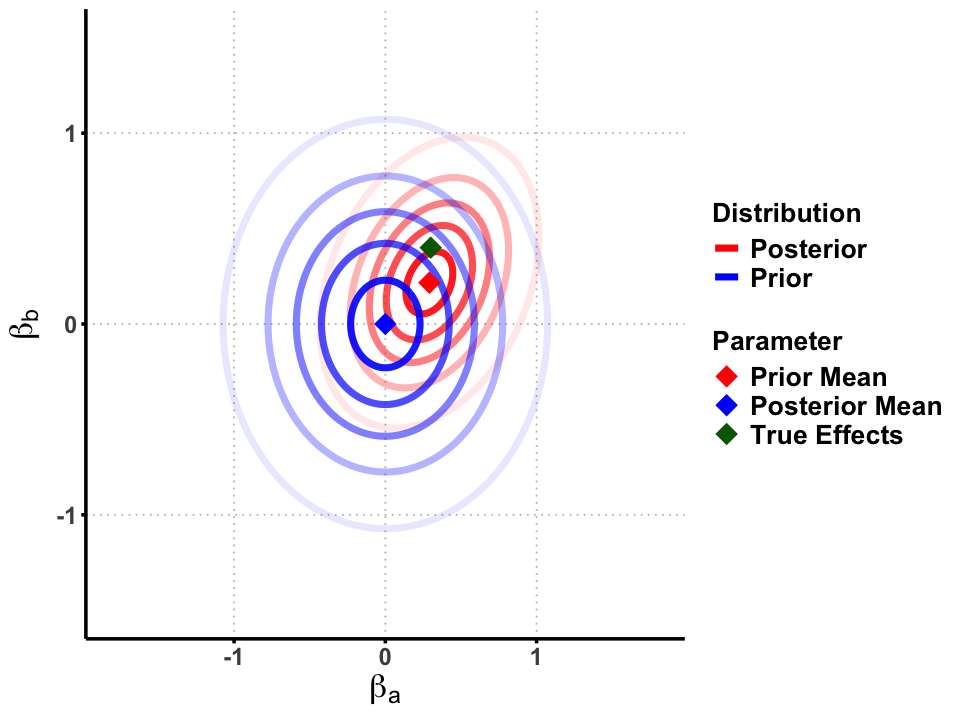

In [74]:
# Add this code after your existing genetic effects analysis

library(ggplot2)
library(ellipse)

# Set plot limits based on the data
xlim <- c(-1.8, 1.8)  # Height effect range
ylim <- c(-1.5, 1.5)  # Weight effect range

# Create multiple contour levels for gradient effect
contour_levels <- seq(0.1, 0.9, by = 0.2)  # Multiple levels for gradient
ellipse_data <- data.frame()

for(i in 1:length(contour_levels)) {
  # Prior ellipse
  prior_ellipse <- ellipse(Sigma_0, centre = beta_0, level = contour_levels[i])
  prior_df <- data.frame(x = prior_ellipse[,1], y = prior_ellipse[,2], 
                        level = contour_levels[i], type = "Prior",
                        alpha_val = 1 - contour_levels[i],  # Reverse alpha: higher density = darker
                        group = paste("Prior", i))  # Add group to separate ellipses
  
  # Posterior ellipse
  post_ellipse <- ellipse(Sigma_1, centre = beta_1, level = contour_levels[i])
  post_df <- data.frame(x = post_ellipse[,1], y = post_ellipse[,2], 
                       level = contour_levels[i], type = "Posterior",
                       alpha_val = 1 - contour_levels[i],  # Reverse alpha: higher density = darker
                       group = paste("Posterior", i))  # Add group to separate ellipses
  
  ellipse_data <- rbind(ellipse_data, prior_df, post_df)
}

# Create the plot
p <- ggplot() +
  # Gradient contour lines (using alpha for fade effect and group to prevent connections)
  geom_path(data = ellipse_data, 
            aes(x = x, y = y, color = type, alpha = alpha_val, group = group), 
            linewidth = 2) +
  # Mean points
  geom_point(data = data.frame(x = beta_0[1], y = beta_0[2], label = "Prior"), 
             aes(x = x, y = y, shape = "Prior"), color = "blue", size = 6) +
  geom_point(data = data.frame(x = beta_1[1], y = beta_1[2], label = "Posterior"), 
             aes(x = x, y = y, shape = "Posterior"), color = "red", size = 6) +
  geom_point(data = data.frame(x = true_beta[1], y = true_beta[2], label = "True"), 
             aes(x = x, y = y, shape = "True"), color = "darkgreen", size = 6) +
  
  # Color and shape scales
  scale_color_manual(values = c("Prior" = "blue", "Posterior" = "red"), name = "Distribution") +
  scale_shape_manual(values = c("Prior" = 18, "Posterior" = 18, "True" = 18), 
                     name = "Parameter",
                     labels = c("Prior Mean", "Posterior Mean", "True Effects")) +
  scale_alpha_identity() +  # Use alpha values directly
  
  labs(x = expression(beta[a]), 
       y = expression(beta[b])) +
  xlim(xlim) + ylim(ylim) +
  theme_minimal() +
  theme(
    # Font styling
    text = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 20, face = "bold"),
    
    # Customize grid and axes
    panel.grid.major = element_line(color = "gray", linetype = "dotted"),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1),
    axis.ticks = element_line(linewidth = 1),
    
    # Transparent background
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA),
    
    # Legend styling
    legend.position = "right",
    legend.text = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 16, face = "bold")
  )

# Show and save plot
options(repr.plot.width = 8, repr.plot.height = 6)
print(p)
ggsave("./cartoons/Bayesian_multivariate_normal_mean_model.png", plot = p,
       width = 10, height = 8, dpi = 300, bg = "transparent")

In [23]:
# Bayesian Bivariate Normal Mean Model Visualization
# This code illustrates Bayesian inference for estimating the mean of a bivariate normal distribution

library(ggplot2)
library(mvtnorm)
library(gridExtra)
library(viridis)
library(ellipse)
library(dplyr)

set.seed(123)

# =============================================================================
# 1. SETUP: Define true parameters and generate data
# =============================================================================

# True parameters (unknown in practice)
true_mean <- c(2, 3)
true_cov <- matrix(c(1, 0.5, 0.5, 2), 2, 2)

# Generate observed data
n <- 30
data <- rmvnorm(n, mean = true_mean, sigma = true_cov)
colnames(data) <- c("X1", "X2")

# Sample statistics
sample_mean <- colMeans(data)
cat("Sample mean:", round(sample_mean, 3), "\n")

# =============================================================================
# 2. BAYESIAN SETUP
# =============================================================================

# Prior specification (conjugate prior for bivariate normal mean)
# Assume known covariance matrix (true_cov) for simplicity
prior_mean <- c(0, 0)  # Prior belief about the mean
prior_cov <- matrix(c(4, 0, 0, 4), 2, 2)  # Prior uncertainty

# Posterior parameters (conjugate update)
# Posterior precision = Prior precision + Data precision
prior_precision <- solve(prior_cov)
data_precision <- n * solve(true_cov)
posterior_precision <- prior_precision + data_precision
posterior_cov <- solve(posterior_precision)

# Posterior mean
posterior_mean <- posterior_cov %*% (prior_precision %*% prior_mean + data_precision %*% sample_mean)

cat("Prior mean:", round(prior_mean, 3), "\n")
cat("Posterior mean:", round(posterior_mean, 3), "\n")
cat("True mean:", round(true_mean, 3), "\n")

# =============================================================================
# 3. VISUALIZATION FUNCTIONS
# =============================================================================

# Function to create contour data for bivariate normal
create_contour_data <- function(mean_vec, cov_mat, xlim, ylim, grid_size = 50) {
  x <- seq(xlim[1], xlim[2], length.out = grid_size)
  y <- seq(ylim[1], ylim[2], length.out = grid_size)
  grid <- expand.grid(X1 = x, X2 = y)
  
  density <- dmvnorm(as.matrix(grid), mean = mean_vec, sigma = cov_mat)
  grid$density <- density
  
  return(grid)
}

# Set plotting limits
xlim <- c(-4, 6)
ylim <- c(-2, 7)

Loading required package: viridisLite


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff,
    setequal, union




Sample mean: 2.046 3.155 
Prior mean: 0 0 
Posterior mean: 2.016 3.095 
True mean: 2 3 


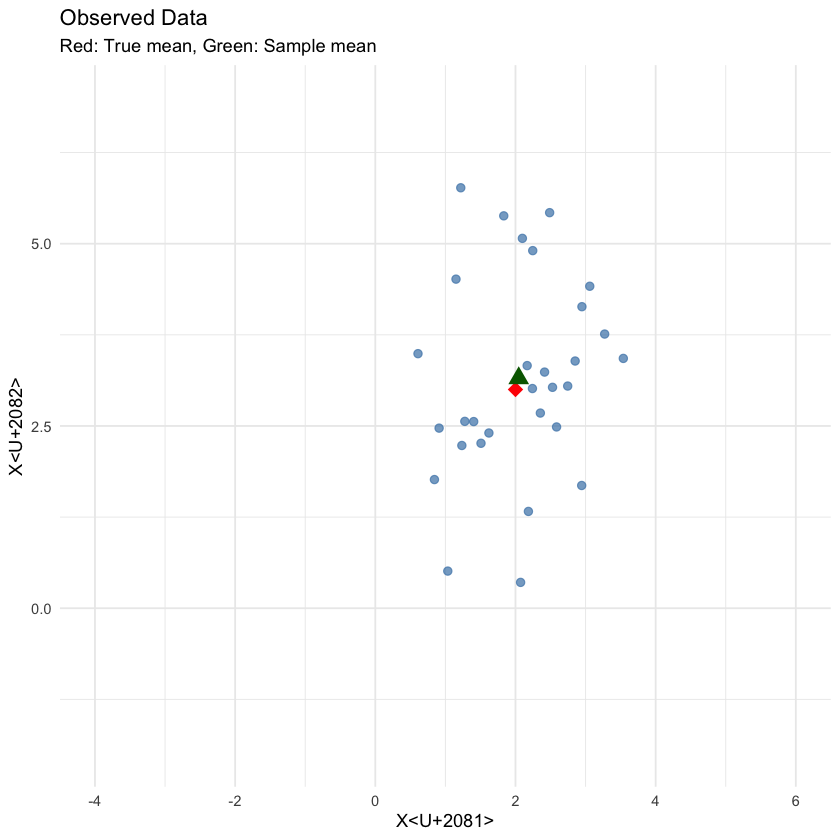

In [24]:

# =============================================================================
# 4. CREATE VISUALIZATIONS
# =============================================================================

# Plot 1: Data scatter plot with true mean
p1 <- ggplot(data.frame(data), aes(x = X1, y = X2)) +
  geom_point(alpha = 0.7, size = 2, color = "steelblue") +
  geom_point(data = data.frame(X1 = true_mean[1], X2 = true_mean[2]), 
             aes(x = X1, y = X2), color = "red", size = 4, shape = 18) +
  geom_point(data = data.frame(X1 = sample_mean[1], X2 = sample_mean[2]), 
             aes(x = X1, y = X2), color = "darkgreen", size = 4, shape = 17) +
  labs(title = "Observed Data", 
       subtitle = "Red: True mean, Green: Sample mean",
       x = "X₁", y = "X₂") +
  xlim(xlim) + ylim(ylim) +
  theme_minimal()
  p1

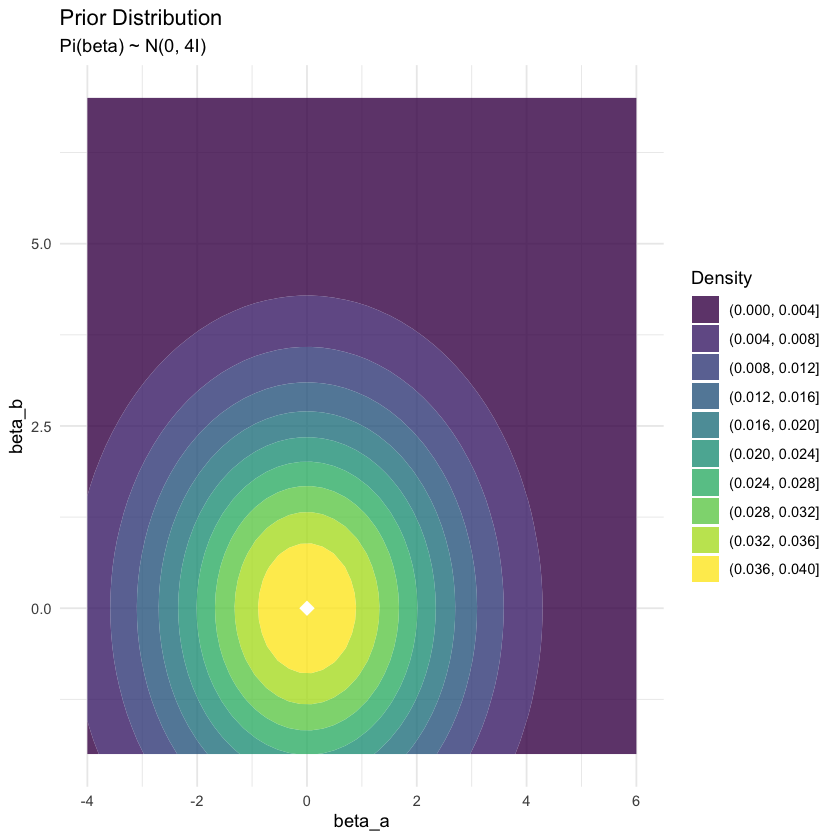

In [27]:
# Plot 2: Prior distribution
prior_grid <- create_contour_data(prior_mean, prior_cov, xlim, ylim)
p2 <- ggplot(prior_grid, aes(x = X1, y = X2, z = density)) +
  geom_contour_filled(alpha = 0.8, bins = 10) +
  geom_point(data = data.frame(X1 = prior_mean[1], X2 = prior_mean[2]), 
             aes(x = X1, y = X2), color = "white", size = 4, shape = 18, inherit.aes = FALSE) +
  scale_fill_viridis_d(name = "Density") +
  labs(title = "Prior Distribution", 
       subtitle = "Pi(beta) ~ N(0, 4I)",
       x = "beta_a", y = "beta_b") +
  xlim(xlim) + ylim(ylim) +
  theme_minimal()
p2

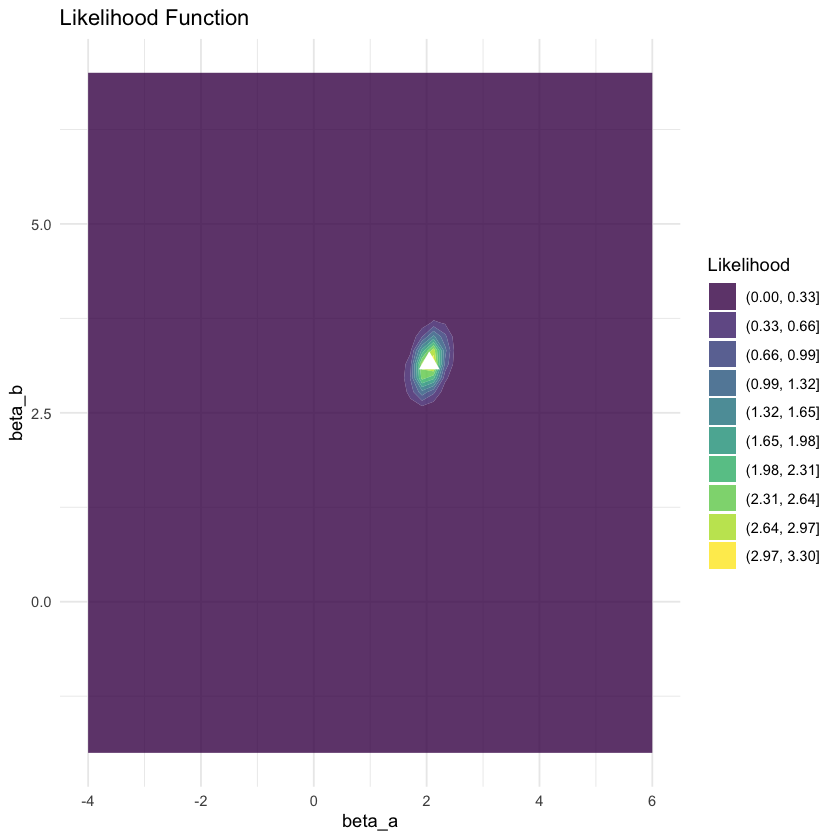

In [28]:
# Plot 3: Likelihood function (centered at sample mean)
likelihood_cov <- true_cov / n  # Standard error of sample mean
likelihood_grid <- create_contour_data(sample_mean, likelihood_cov, xlim, ylim)
p3 <- ggplot(likelihood_grid, aes(x = X1, y = X2, z = density)) +
  geom_contour_filled(alpha = 0.8, bins = 10) +
  geom_point(data = data.frame(X1 = sample_mean[1], X2 = sample_mean[2]), 
             aes(x = X1, y = X2), color = "white", size = 4, shape = 17, inherit.aes = FALSE) +
  scale_fill_viridis_d(name = "Likelihood") +
  labs(title = "Likelihood Function", 
    #    subtitle = "L(μ|data) ∝ exp(-½n(μ-x̄)ᵀΣ⁻¹(μ-x̄))",
       x = "beta_a", y = "beta_b") +
  xlim(xlim) + ylim(ylim) +
  theme_minimal()
p3

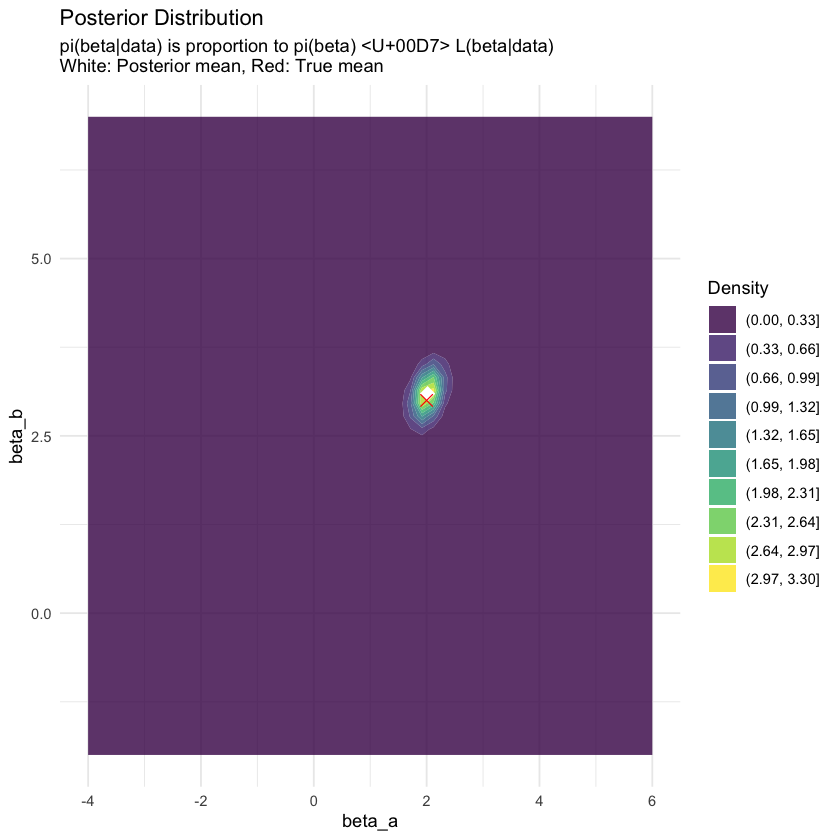

In [29]:
posterior_grid <- create_contour_data(posterior_mean, posterior_cov, xlim, ylim)
p4 <- ggplot(posterior_grid, aes(x = X1, y = X2, z = density)) +
  geom_contour_filled(alpha = 0.8, bins = 10) +
  geom_point(data = data.frame(X1 = posterior_mean[1], X2 = posterior_mean[2]), 
             aes(x = X1, y = X2), color = "white", size = 4, shape = 18, inherit.aes = FALSE) +
  geom_point(data = data.frame(X1 = true_mean[1], X2 = true_mean[2]), 
             aes(x = X1, y = X2), color = "red", size = 3, shape = 4, inherit.aes = FALSE) +
  scale_fill_viridis_d(name = "Density") +
  labs(title = "Posterior Distribution", 
       subtitle = "pi(beta|data) is proportion to pi(beta) × L(beta|data)\nWhite: Posterior mean, Red: True mean",
       x = "beta_a", y = "beta_b") +
  xlim(xlim) + ylim(ylim) +
  theme_minimal()
p4

Warning message:
"Using `size` aesthetic for
lines was deprecated in
ggplot2 3.4.0.
i Please use `linewidth`
  instead."


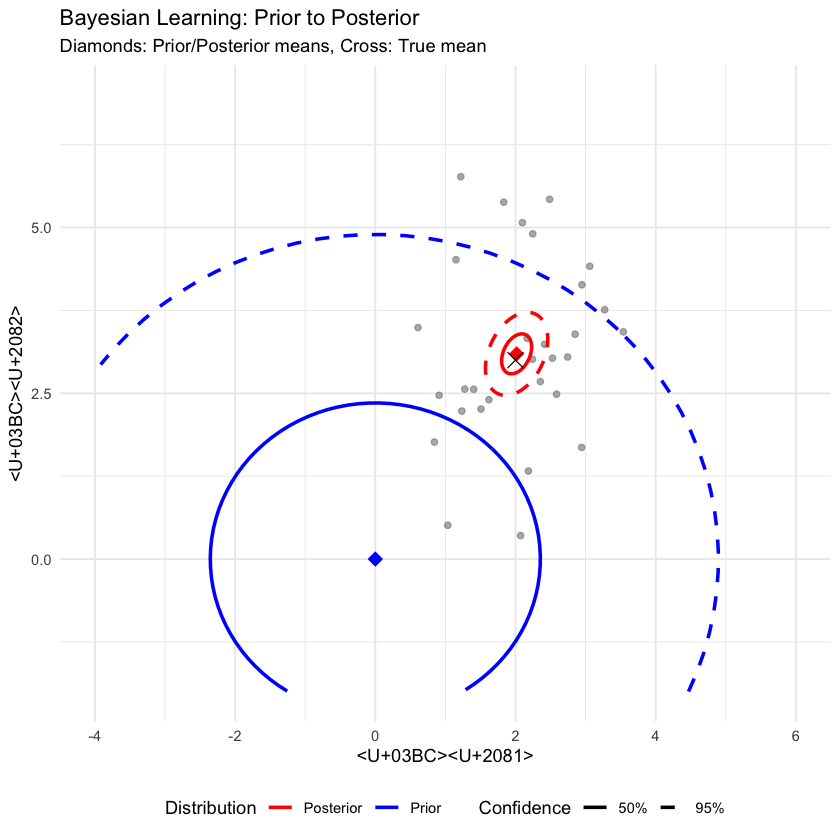

In [30]:
# Create confidence ellipses
conf_levels <- c(0.5, 0.95)
colors <- c("blue", "red")
ellipse_data <- data.frame()

for(i in 1:length(conf_levels)) {
  # Prior ellipse
  prior_ellipse <- ellipse(prior_cov, centre = prior_mean, level = conf_levels[i])
  prior_df <- data.frame(prior_ellipse, level = conf_levels[i], type = "Prior")
  
  # Posterior ellipse
  post_ellipse <- ellipse(posterior_cov, centre = posterior_mean, level = conf_levels[i])
  post_df <- data.frame(post_ellipse, level = conf_levels[i], type = "Posterior")
  
  ellipse_data <- rbind(ellipse_data, prior_df, post_df)
}

p5 <- ggplot() +
  # Data points
  geom_point(data = data.frame(data), aes(x = X1, y = X2), 
             alpha = 0.6, size = 1.5, color = "gray50") +
  # Confidence ellipses
  geom_path(data = ellipse_data, 
            aes(x = x, y = y, color = type, linetype = factor(level)), 
            size = 1) +
  # Mean points
  geom_point(data = data.frame(X1 = prior_mean[1], X2 = prior_mean[2]), 
             aes(x = X1, y = X2), color = "blue", size = 4, shape = 18) +
  geom_point(data = data.frame(X1 = posterior_mean[1], X2 = posterior_mean[2]), 
             aes(x = X1, y = X2), color = "red", size = 4, shape = 18) +
  geom_point(data = data.frame(X1 = true_mean[1], X2 = true_mean[2]), 
             aes(x = X1, y = X2), color = "black", size = 4, shape = 4) +
  scale_color_manual(values = c("Prior" = "blue", "Posterior" = "red")) +
  scale_linetype_manual(values = c("0.5" = "solid", "0.95" = "dashed"),
                       labels = c("50%", "95%"),
                       name = "Confidence") +
  labs(title = "Bayesian Learning: Prior to Posterior",
       subtitle = "Diamonds: Prior/Posterior means, Cross: True mean",
       x = "μ₁", y = "μ₂",
       color = "Distribution") +
  xlim(xlim) + ylim(ylim) +
  theme_minimal() +
  theme(legend.position = "bottom")

print(p5)